<a href="https://colab.research.google.com/github/thegrouch4413/data_analytics/blob/main/COVID19_DATA_ANALYSIS_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [62]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151422 entries, 0 to 2151421
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 98.5+ MB


In [64]:
df.shape

(2151422, 6)

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [65]:
nyc_df = df[df['county']=='New York City']
nyc_df.head(7)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
627,2020-03-06,New York City,New York,NaN,5,0.0
715,2020-03-07,New York City,New York,NaN,12,0.0


In [66]:
nyc_df.tail(7)

,date,county,state,fips,cases,deaths
2130518,2022-01-19,New York City,New York,NaN,2145910,37122.0
2133770,2022-01-20,New York City,New York,NaN,2159384,37228.0
2137024,2022-01-21,New York City,New York,NaN,2171659,37364.0
2140281,2022-01-22,New York City,New York,NaN,2185081,37364.0
2143537,2022-01-23,New York City,New York,NaN,2193995,37519.0
2146792,2022-01-24,New York City,New York,NaN,2199434,37544.0
2150045,2022-01-25,New York City,New York,NaN,2207235,37757.0


In [67]:
nyc_df.count()

date      696
county    696
state     696
fips        0
cases     696
deaths    696
dtype: int64

In [68]:
nyc_first_death = nyc_df[nyc_df['deaths']!=0]
nyc_first_death.head()

,date,county,state,fips,cases,deaths
2163,2020-03-14,New York City,New York,NaN,269,1.0
2574,2020-03-15,New York City,New York,NaN,330,5.0
3033,2020-03-16,New York City,New York,NaN,464,7.0
3549,2020-03-17,New York City,New York,NaN,646,11.0
4150,2020-03-18,New York City,New York,NaN,1344,25.0


In [69]:
nyc_df.max()

date         2022-01-25
county    New York City
state          New York
fips                NaN
cases           2207235
deaths            37757
dtype: object

In [70]:
nyc_df = nyc_df.drop('fips', inplace=False, axis=1)

In [71]:
new_cases = nyc_df['cases'].diff()
for index, row in nyc_df.iterrows():
  nyc_df.append(new_cases)
  nyc_df['new_cases'] = new_cases
nyc_df.head()

,date,county,state,cases,deaths,new_cases
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0


In [72]:
nyc_df.loc[416, 'new_cases'] = 1
nyc_df_1 = nyc_df
nyc_df_1

,date,county,state,cases,deaths,new_cases
416,2020-03-01,New York City,New York,1,0.0,1.0
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0
...,...,...,...,...,...,...
2137024,2022-01-21,New York City,New York,2171659,37364.0,12275.0
2140281,2022-01-22,New York City,New York,2185081,37364.0,13422.0
2143537,2022-01-23,New York City,New York,2193995,37519.0,8914.0
2146792,2022-01-24,New York City,New York,2199434,37544.0,5439.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d11dc5990>,
      dtype=object)

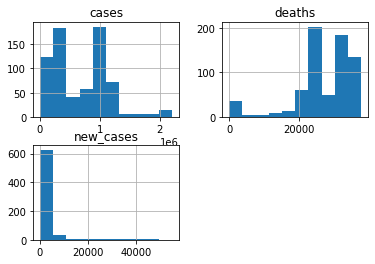

In [73]:
nyc_df_1.hist()

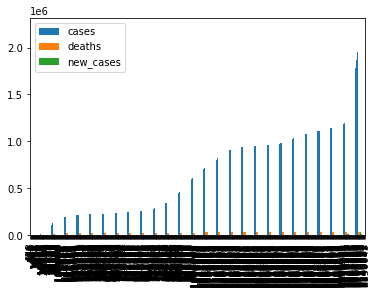

In [74]:
nyc_df_1.plot(kind='bar')

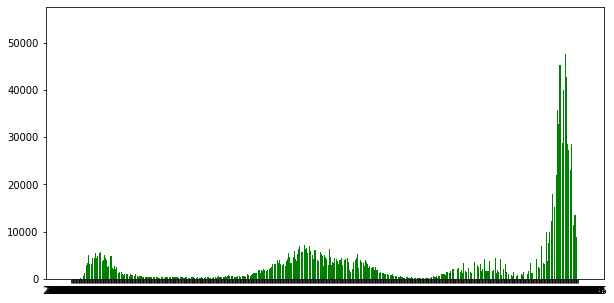

In [76]:
plt.figure(figsize=(10,5))
plt.bar(x=nyc_df_1['date'], height=nyc_df_1['new_cases'], color='green')
plt.show()

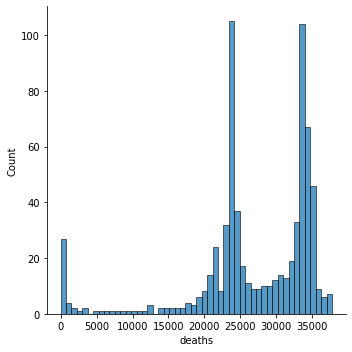

In [77]:
sns.displot(nyc_df_1['deaths'], bins=50)

# Task4: Understand NY covid 19 data in last 30 days

In [78]:
last30day_nyc_cases = nyc_df_1['cases'][-30:]
last30day_nyc_new_cases = nyc_df_1['new_cases'][-30:]
last30day_nyc_dates = nyc_df_1['date'][-30:]

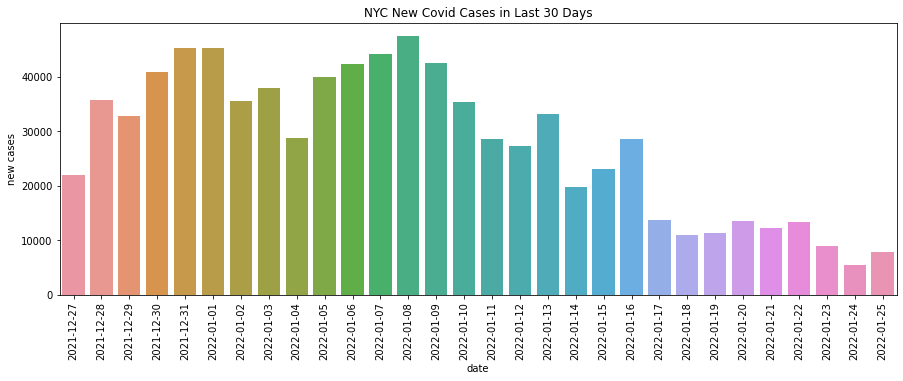

In [79]:
plt.figure(figsize=(15, 5))
sns.barplot(data=nyc_df_1, x = last30day_nyc_dates, y = last30day_nyc_new_cases,)
plt.xticks(rotation=90)
plt.title("NYC New Covid Cases in Last 30 Days")
plt.ylabel("new cases")
plt.show()

In [80]:
new_deaths = nyc_df['deaths'].diff()
for index, row in nyc_df_1.iterrows():
  nyc_df_1.append(new_deaths)

In [81]:
nyc_df_1['new_deaths'] = new_deaths
last30day_nyc_deaths = nyc_df_1['new_deaths'] [-30:]

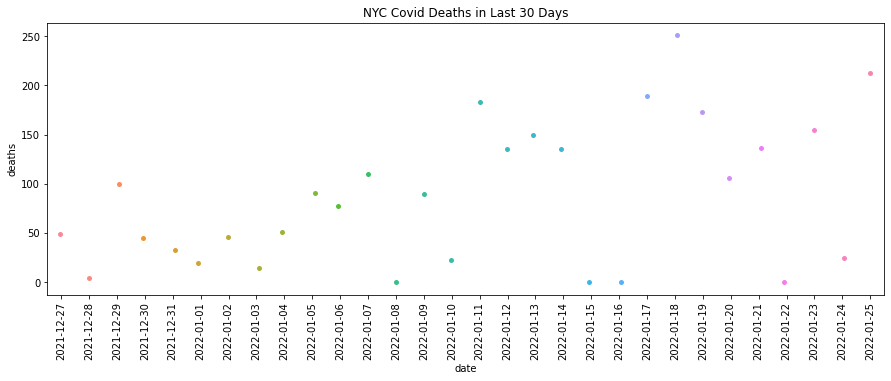

In [82]:
plt.figure(figsize=(15, 5))
sns.stripplot(data=nyc_df_1, x = last30day_nyc_dates, y = last30day_nyc_deaths)
plt.xticks(rotation=90)
plt.title("NYC Covid Deaths in Last 30 Days")
plt.ylabel("deaths")
plt.show()

# Comparing Covid 19 data with different states

In [83]:
states = ['New York','Texas','California','Illinois','Colorado']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

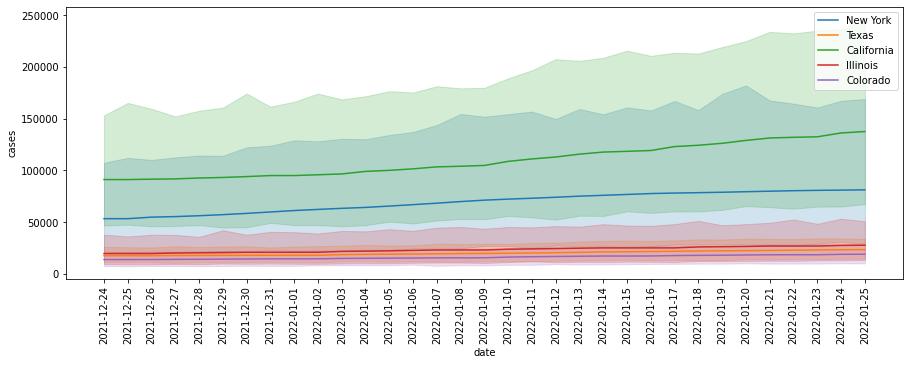

In [84]:
plt.figure(figsize=(15,5))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-12-24')]
  sns.lineplot(df_st['date'], df_st['cases'])
  plt.xticks(rotation=90)

plt.legend(states)
plt.show()

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     -- Positive cases continuously rise and fall. This may be due to a lax in protection, caution and lower mask use when numbers fall, causing them to increase again
2.   Conclusion 2
     --Number of cases are not correlated through the size of the state but population density of state. Texas is larger than both California and New York, yet pale in comparison of cases.

